In [1]:
import numpy as np
import scipy
import scipy.stats
import pandas as pd
import sunpy.map
import cv2
import skimage
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
import seaborn_image as isns
sns.set_style("darkgrid")

%matplotlib inline

import tensorflow as tf
from tensorflow import keras
from keras import layers

import autoenc_model as aem
import data_generator as dg

2023-03-12 16:22:57.001423: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
batch_size = 256
gen_input = dg.SunImgAEGenerator("data/aia_193A/", batch_size, test_split=0.2, shuffle=True)

(9, 1, 1) (9, 1, 1) (9, 1, 1)


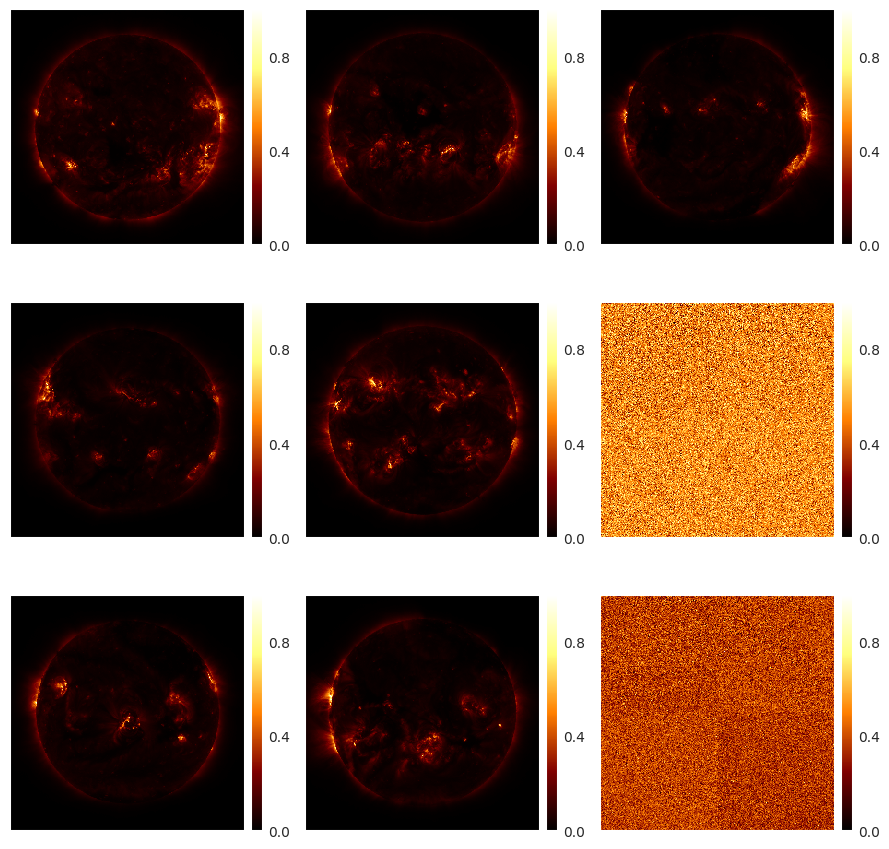

In [3]:
samples = gen_input.sample(9)
isns.ImageGrid([i for i in samples], cmap="afmhot")

In [4]:
latent_size = 96
autoencoder, encoder, decoder = aem.gen_autoenc_model(latent_size, optim="adam", loss="mse")

2023-03-12 16:22:58.897454: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-12 16:22:58.910449: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-12 16:22:58.910624: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-12 16:22:58.911118: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  FMA
To enable them in other operations, rebuild TensorFlow w

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 8)       80        
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 8)       584       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 8)      0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 16)      1168      
                                                                 
 conv2d_3 (Conv2D)           (None, 128, 128, 16)      2320      
                                                             

In [5]:
n_epochs = 200

gen_input.training = True
history = autoencoder.fit(gen_input, epochs=n_epochs)
gen_input.training = False

Epoch 1/200


2023-03-12 16:23:04.095794: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8600
2023-03-12 16:23:05.607672: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-03-12 16:23:08.258090: W tensorflow/tsl/framework/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 4.30GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


80/80 [==============================] - 141s 2s/step - loss: 0.0118 - mae: 0.0584
Epoch 2/200
80/80 [==============================] - 126s 2s/step - loss: 0.0035 - mae: 0.0312
Epoch 3/200
80/80 [==============================] - 127s 2s/step - loss: 0.0031 - mae: 0.0285
Epoch 4/200
80/80 [==============================] - 127s 2s/step - loss: 0.0029 - mae: 0.0268
Epoch 5/200
80/80 [==============================] - 127s 2s/step - loss: 0.0030 - mae: 0.0275
Epoch 6/200
80/80 [==============================] - 127s 2s/step - loss: 0.0027 - mae: 0.0258
Epoch 7/200
80/80 [==============================] - 127s 2s/step - loss: 0.0026 - mae: 0.0252
Epoch 8/200
80/80 [==============================] - 127s 2s/step - loss: 0.0026 - mae: 0.0250
Epoch 9/200
80/80 [==============================] - 127s 2s/step - loss: 0.0025 - mae: 0.0245
Epoch 10/200
80/80 [==============================] - 131s 2s/step - loss: 0.0025 - mae: 0.0243
Epoch 11/200
80/80 [==============================] - 132s 2s

In [6]:
autoencoder.save("autoencoder.h5")
encoder.save("encoder.h5")
decoder.save("decoder.h5")

80/80 [==============================] - 135s 2s/step - loss: 0.0018 - mae: 0.0186


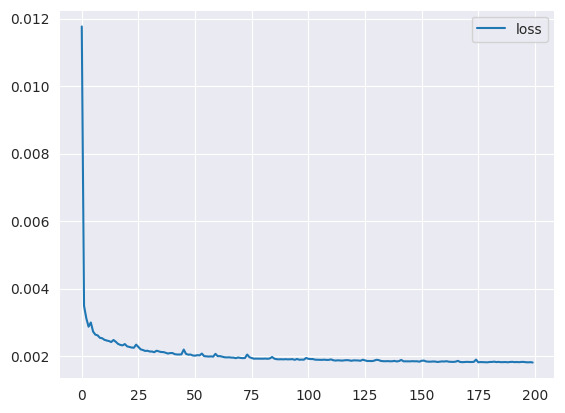

In [9]:
gen_input.training = False
autoencoder.evaluate(gen_input)
plt.plot(history.history['loss'], label='loss')
#plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()


(5, 1, 1) (5, 1, 1) (5, 1, 1)
1/1 [==============================] - 0s 15ms/step


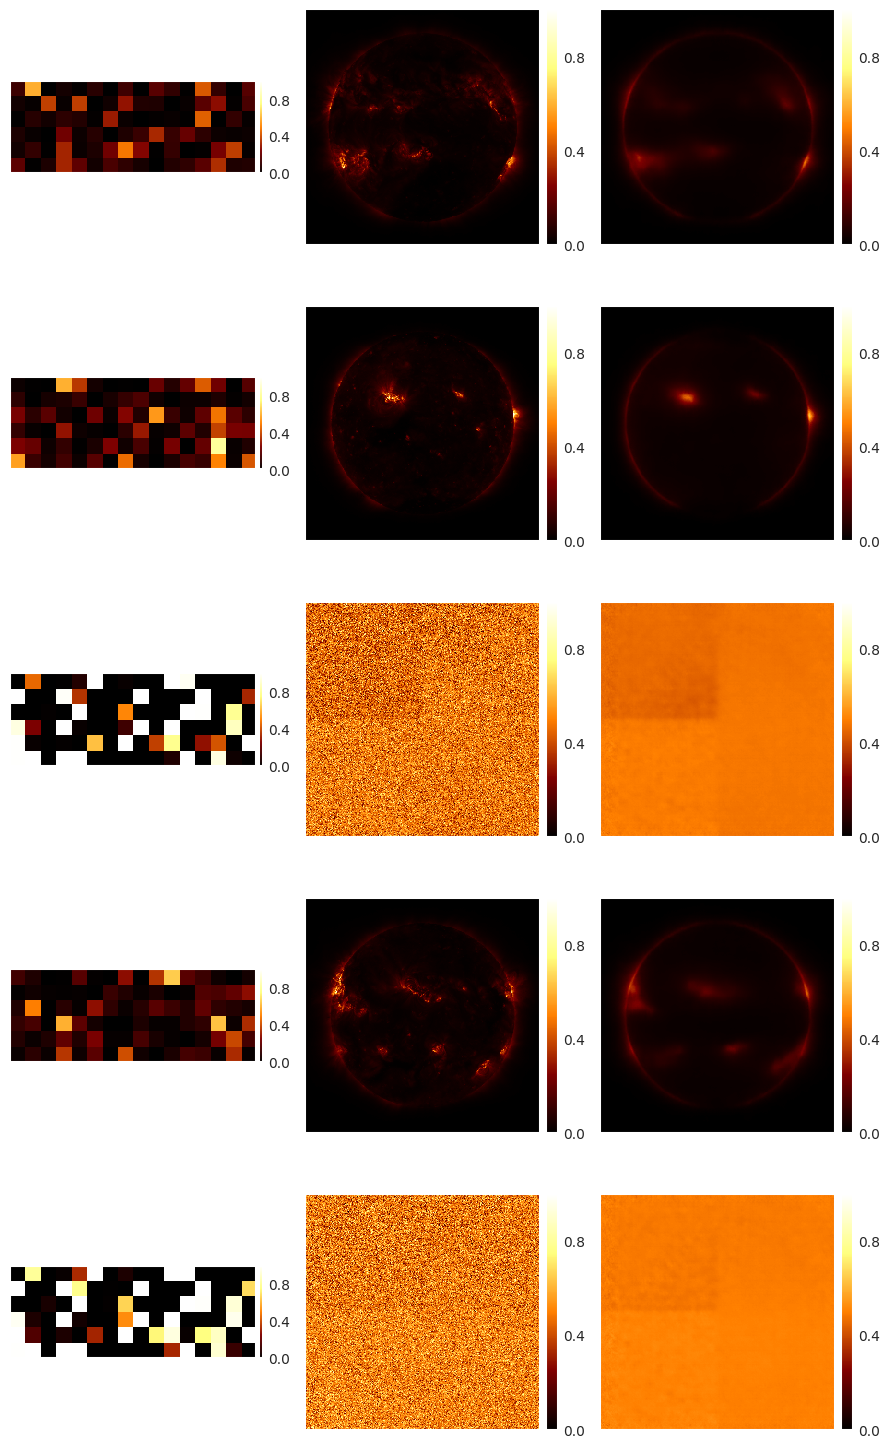

In [71]:
gen_input.take_all = True
example = gen_input.sample(5)
code = encoder.predict(example)
reconstructed = decoder(code)

images_zipped = [i for i in zip(code, example, reconstructed)]
images = []

for i in images_zipped:
    images.append(np.reshape(i[0], [6,16]))
    images.append(np.squeeze(i[1]))
    images.append(np.squeeze(i[2]))
    

isns.ImageGrid(images, cmap="afmhot", vmin=0, vmax=1)

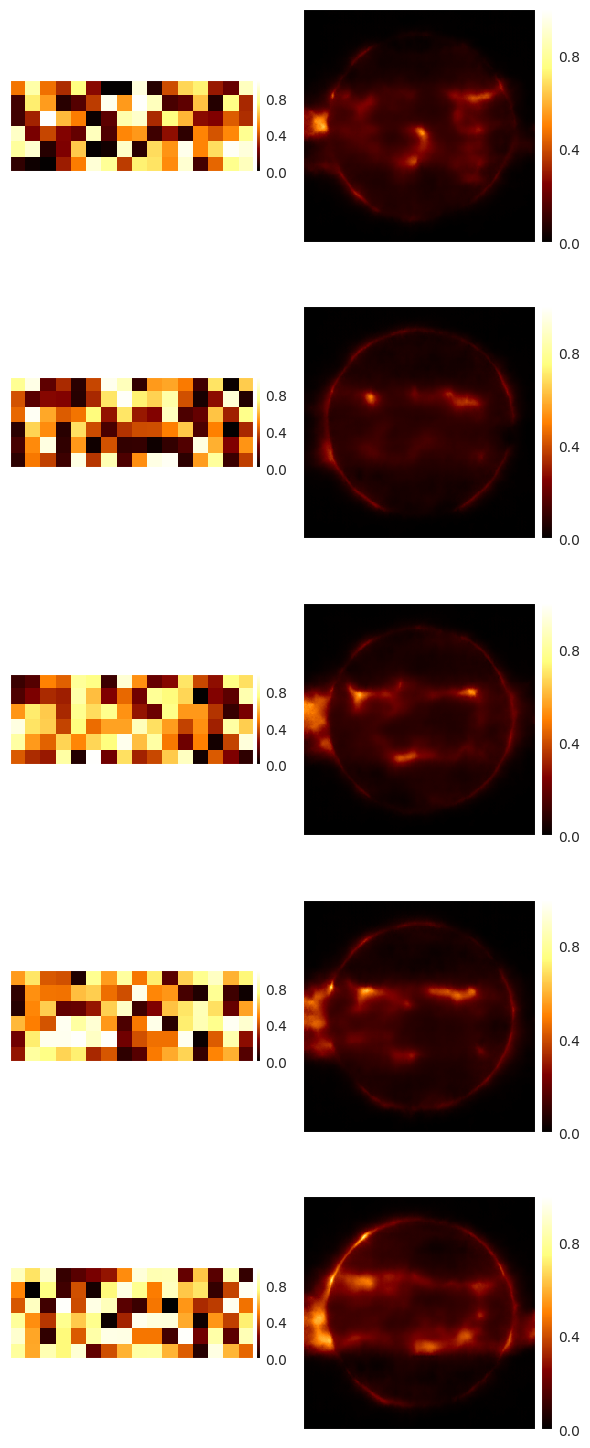

In [90]:
code = np.random.random([5, 96])
reconstructed = decoder(code)

images_zipped = [i for i in zip(code, reconstructed)]
images = []

for i in images_zipped:
    images.append(np.reshape(i[0], [6,16]))
    images.append(np.squeeze(i[1]))
    

isns.ImageGrid(images, cmap="afmhot", vmin=0, vmax=1, col_wrap=2)